<a href="https://colab.research.google.com/github/EdsonFrota/Inteligencia_Artificial/blob/master/AdalineSimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt # Para visualizacao dos dados e erro
from sklearn import datasets #Sklearn contem datasets
import numpy as np #Numpy para trabalhar com arrays
from matplotlib.colors import ListedColormap # lista de cores

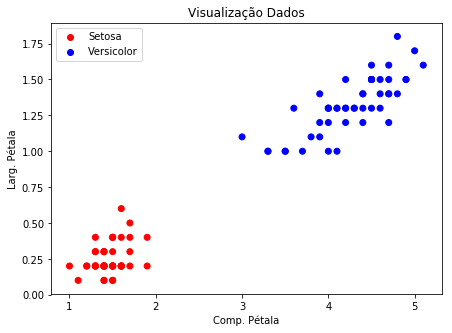

In [4]:
### Carrega dados da Iris (dataset)
iris_datasets = datasets.load_iris()
### 100 primeiras amostras e 2 caracteristicas
X = iris_datasets.data[:100, 2:] # 2 caracteristicas: compr. petala e larg. petala
y = iris_datasets.target[:100] # flores setosa = 0 e versicolor = 1
### Rotulos da Setosa eh -1 e Versicolor eh 1
for i in range(50):
    y[i] = -1

### Plota dados da iris
### Vermelho ----> Setosa (-1)
### Azuis ----> Versicolor (1)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
plt.scatter(None, None, color = 'r', label='Setosa')
plt.scatter(None, None, color = 'b', label='Versicolor')
plt.legend()
plt.title('Visualização Dados')
plt.xlabel('Comp. Pétala')
plt.ylabel('Larg. Pétala')
plt.show()

In [0]:
class mlp(object):
    def __init__(self, eta = 0.001, epoca=150):
        self.eta = eta
        self.epoca = epoca
        self.epsilon = 0.1

    def fit(self, X, y):
        np.random.seed(16)
        self.peso_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.erro_ = []
        no_amostras = len(X)
        
        for i in range(self.epoca):
            saida = self.funcao_ativacao(X)
            erro = y - saida
        
            self.peso_[0] += self.eta * erro.sum()
            self.peso_[1:] += self.eta * X.T.dot(erro)
            
            eqm = (erro**2).sum()/(2.0*no_amostras)
            self.erro_.append(eqm) 
            
            if i==0 : eqm_novo = eqm
            elif abs(eqm_novo-eqm) <= self.epsilon :
                print('epoca: %d' % i)
                print('eqm: %f' % (eqm_novo-eqm))
                eqm = 0
                break 
        return self

    def entrada(self, X):
        """Calcula entrada u"""
        return np.dot(X, self.peso_[1:]) + self.peso_[0]
    def funcao_ativacao(self, X):
        """Calcula saida g(u)"""
        return self.entrada(X)
    def predict(self, X):
        """Retorna valor 0 ou 1"""
        return np.where(self.funcao_ativacao(X) >= 0.0, 1, -1)

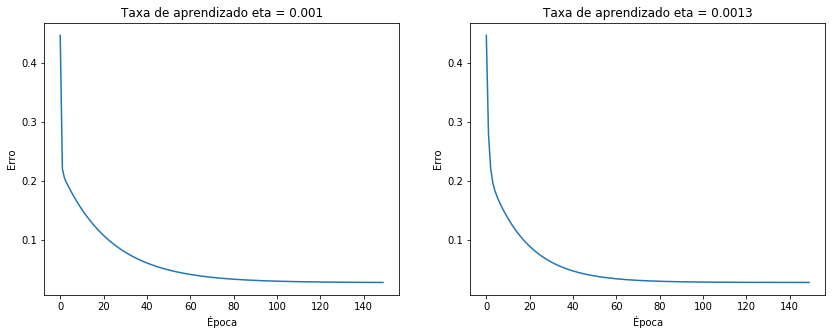

In [0]:
###Plota o erro depois de det. precisao e/ou 150 epocas
estudos = ['Taxa de aprendizado eta = 0.001', 'Taxa de aprendizado eta = 0.0013']
classificadores = [mlp(), mlp(eta = 0.0013)]
passo = 1
plt.figure(figsize=(14,5))
for estudo, classificador in zip(estudos, classificadores):
    ax = plt.subplot(1, 2, passo)
    clf = classificador.fit(X, y)
    ax.plot(range(len(clf.erro_)), clf.erro_)
    ax.set_ylabel('Erro')
    ax.set_xlabel('Época')
    ax.set_title(estudo)

    passo += 1

plt.show()

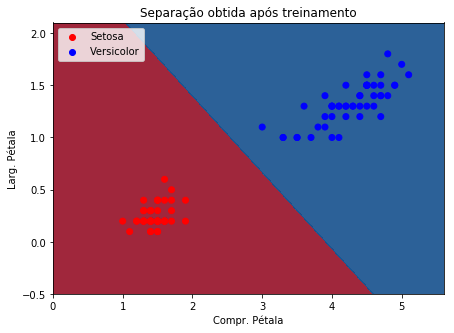

In [9]:
### Plota a linha divisoria obtida pela mlp
clf = mlp()
clf.fit(X, y)

# x_min, x_max, y_min, y_max
x_min, x_max = X[:, 0].min() - 2., X[:, 0].max() + .5
y_min, y_max = X[:, 0].min() - 2, X[:, 0].max()

#Tamanho do passo no mesh
h = 0.001
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#Cria a cor para os pontos de treino e teste
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Coloca resultados na plotagem
Z = Z.reshape(xx.shape)


plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap=cm, alpha=.9)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
plt.scatter(None, None, color = 'r', label='Setosa')
plt.scatter(None, None, color = 'b', label='Versicolor')
plt.legend()
plt.xlim([x_min + 1.0, x_max])
plt.ylim([y_min + 0.5, y_max - 3.0])
plt.title('Separação obtida após treinamento')
plt.xlabel('Compr. Pétala')
plt.ylabel('Larg. Pétala')
plt.show()